## AIM: To create a data visualization which shows the proportional usage of the individual pitches within a player's arsenal.

***

These graphs are created in a 'static' manner and are cached for the final web app to be used. The reason these graphs are not created based on a 'need-to' basis is because the backend dataset required is very large and will take too long to be read in on a real-time basis. 

Therefore, to improve performance and the final product UX, these plots are created beforehand and saved in the backend.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Elected not to use waffle plots
# from pywaffle import Waffle

In [2]:
# Work with uncleaned pitch data since they contain all columns
# cleaned has dropped some columns that may needed for this purpose
df = pd.read_csv('pitches_finalv2.csv',index_col = 0)

C:\ProgramData\Anaconda\envs\capstone\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# List of players to go through for now
player_list = ['Clayton Kershaw', 'Justin Verlander', 'Max Scherzer', 'Stephen Strasburg', 'Gerrit Cole',
              'Jacob deGrom', 'Zack Greinke', 'Madison Bumgarner', 'Marcus Stroman', 'Chris Sale', 'Hyun-Jin Ryu']

In [4]:
# Making sure this workflow will work
player = df[df['player_name'] == 'Hyun-Jin Ryu']

# Get pitch counts for each pitch type
pitch_counts = player['pitch_name'].value_counts().values

# Total number of pitches
total = len(player)

# Convert to percentage
pitch_pct = pitch_counts/total*100

# Create a new dataframe with the percentage data, index will be the pitch names
pcts = pd.DataFrame(pitch_pct, index = player['pitch_name'].value_counts().index)

# Drop non-pitches, set errors to ignore if they aren't present
pcts.drop(['Intentional Ball', 'Pitch Out'], inplace = True, errors='ignore')
# Drop pitches less than 0.5%, will only gunk up the final visualizations since they're going to be such small pieces
pcts.drop(pcts[pcts[0] < 0.5].index, axis=0, inplace=True)

pcts
# Pywaffle takes data in dictionary format
# data = pcts[0].values
# data

,0
4-Seam Fastball,31.226024
Changeup,24.535829
Cutter,19.671628
Curveball,14.792082
2-Seam Fastball,7.887065
Slider,1.810649


In [5]:
# Make sure I can get the pitch label
pcts[0].index[0]

'4-Seam Fastball'

***

After researching and considering the many options for creating a data visualization that shows individual proportions of a whole, I decided on a donut plot over the pie chart and waffle plot. The decision was made primarily on aesthetics and functionality.

I decided against the waffle plot because it wasn't as inituitive to see the relative proportions of individual pitches and the size of the 'whole' was too arbitrary for my liking.

A pie chart is the simpler cousin of the donut chart but I decided against it because of thow the proportional area distorts the true relative proportions of individual slices. I figured a donut chart, with less overall area, would be more effective.

***

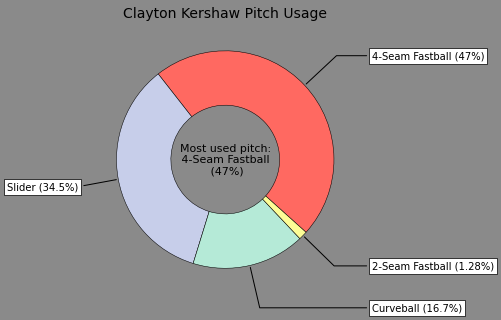

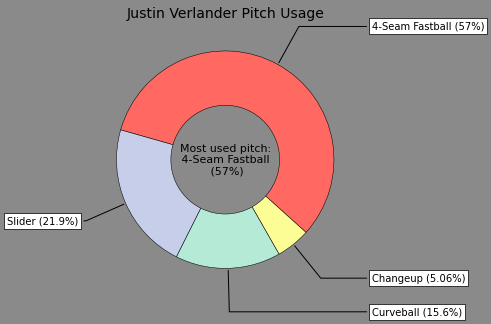

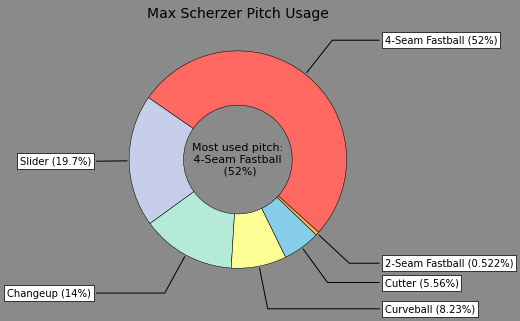

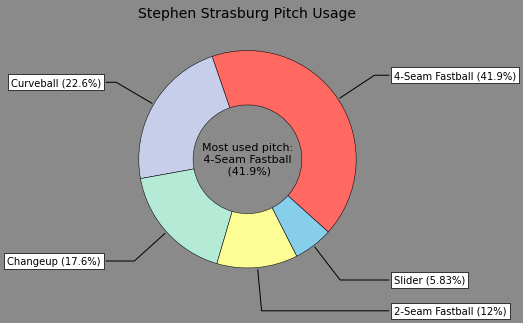

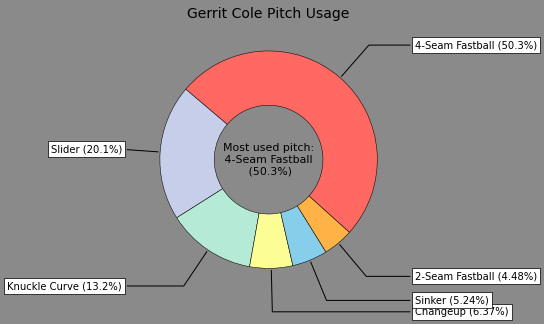

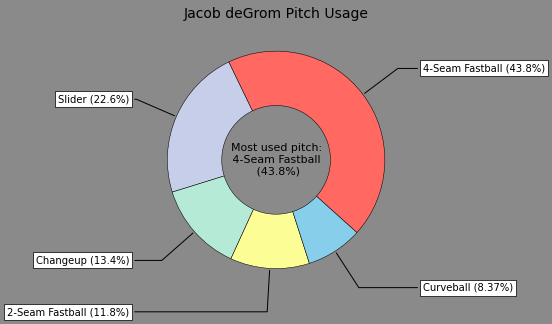

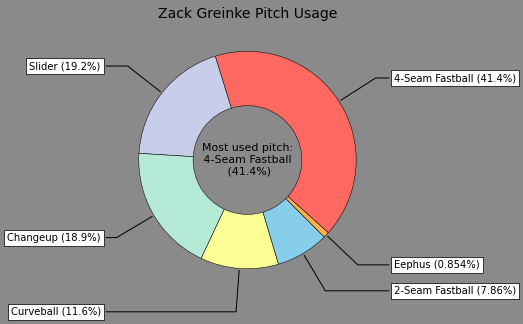

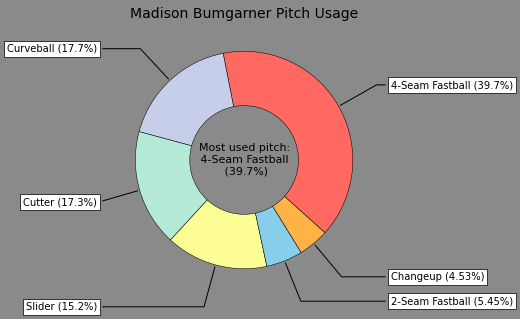

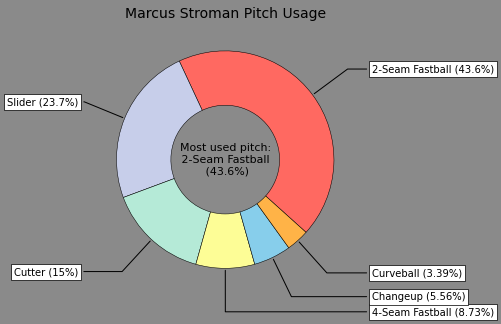

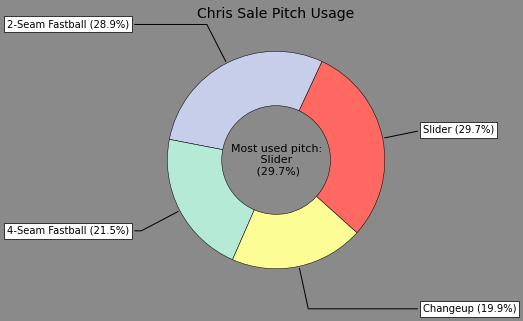

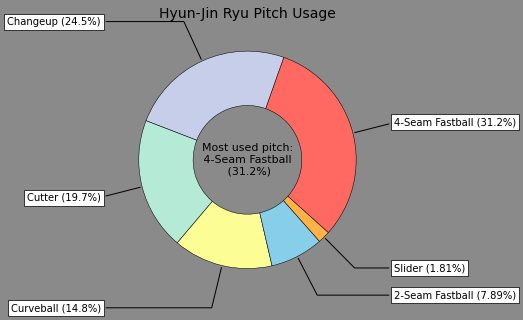

In [7]:
# Automate the creation of donut plots
# Template code from https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
# Loop through and create plot for each player on list
for name in player_list: 
    # New df for each player in list
    player = df[df['player_name'] == name]
    
    # Get pitch counts for each pitch
    pitch_counts = player['pitch_name'].value_counts().values
    
    # Total # of pitches
    total = len(player)
    
    # Convert to percentage
    pitch_pct = pitch_counts/total*100
    # Turn to dataframe
    pcts = pd.DataFrame(pitch_pct, index = player['pitch_name'].value_counts().index)

    # Drop non-pitches, set errors to ignore if they aren't present
    pcts.drop(['Intentional Ball', 'Pitch Out'], inplace = True, errors='ignore')
    # Drop pitches less than 0.5%
    pcts.drop(pcts[pcts[0] < 0.5].index, axis=0, inplace=True)
    # Set data since pie charts work with arrays
    data = pcts[0].values

    # Code from matplotlib site https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
    fig, ax = plt.subplots(figsize=(9, 5), subplot_kw=dict(aspect="equal"))
    # Set background color to match the flask background
    fig.patch.set_facecolor('#8a8a8a')
    
    # List of colours for chart sections, list 8 just in case
    # No pitcher throws > 8 different pitches at > 5% frequency
    clist = ['#FF6961', '#C7CEEA', '#B5EAD7', '#fdfd96', '#87ceeb', '#ffb347', '#cfcfc4', '#77dd77']
    
    # Set the pie wedges, add darkgrey outline, set color palette
    # Set start angle for clearner chart (ie. minimize title/label overlap)
    wedges, texts = ax.pie(data, wedgeprops=dict(edgecolor = 'black', linewidth = 0.5, width=0.5), 
                           startangle=-42, colors = clist)
    
    # Create binding box/arrow labels for the wedges
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")
    
    # Iterate through the various wedgest
    for i, p in enumerate(wedges):
        # Get the angle of how to draw the lines
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        # Convert to radians
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        # This code was a bit complicated for me to decipher
        # I understand it is to format the alignment of the lines with the box
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        
        # Annotate the wedges in pitch (usage%) formate
        ax.annotate(f'{pcts[0].index[i]} ({float(f"{data[i]:.3g}"):g}%)', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
        
    # Add text in center of donut
    # Used f strings with ''' ''' for multi line text
    ax.text(0.5, 0.5, f'''Most used pitch:\n {pcts[0].index[0]} \n ({float(f"{data[0]:.3g}"):g}%)''', 
            fontsize=11, color = 'black', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    # Title
    ax.set_title(f'{name} Pitch Usage', fontsize = 14, color = 'black')
    # Have to specify the face color in order for it to save
#     plt.savefig(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/staticplots/{name}_usage_light.png', 
#                 facecolor=fig.get_facecolor())
    plt.show()




***

Tried out waffle plots as well to show proportion of pitch usage but found donuts to be better

In [1]:
'''
for name in player_list: 
    # New df for each player in list
    player = df[df['player_name'] == name]
    
    # Get pitch counts for each pitch
    pitch_counts = player['pitch_name'].value_counts().values
    
    # Convert to percentage
    pitch_pct = pitch_counts/total*100

    pcts = pd.DataFrame(pitch_pct, index = player['pitch_name'].value_counts().index)

    # Drop non-pitches, set errors to ignore if they aren't present
    pcts.drop(['Intentional Ball', 'Pitch Out'], inplace = True, errors='ignore')
    # Drop pitches less than 0.5%
    pcts.drop(pcts[pcts[0] < 0.5].index, axis=0, inplace=True)
    # Pywaffle takes data in dictionary format
    data = pcts[0].to_dict()

    # Create waffle plot
    # Chose waffle plot over pie chart for displaying relative proportions
    # Easier to see/infer from evenly distributed blocks vs area of circle slice
    fig = plt.figure(
        # Instatiate the Waffle plot
        FigureClass=Waffle,
        # Get 0.5% granularity for each block (ie. 200 (40x5) blocks)
        rows=5,
        columns = 40,
        values=data,
        figsize=(12, 8),  # figsize is a parameter of matplotlib.pyplot.figure
        # Loop through dict for labels and get key/value
        # Set percentage to 3 sig figs
        labels=[f"{k} ({float(f'{v:.3g}'):g}%)" for k, v in data.items()],
        # Set legend to left, transparent frame
        legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1.1), 'framealpha': 0}
    )
    plt.title(f'{name} Career Pitch Usage')
    # Save plots using f-string
    plt.savefig(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/plots/{name}_usage.png')
    plt.show()
    
'''

'\nfor name in player_list: \n    # New df for each player in list\n    player = df[df[\'player_name\'] == name]\n    \n    # Get pitch counts for each pitch\n    pitch_counts = player[\'pitch_name\'].value_counts().values\n    \n    # Convert to percentage\n    pitch_pct = pitch_counts/total*100\n\n    pcts = pd.DataFrame(pitch_pct, index = player[\'pitch_name\'].value_counts().index)\n\n    # Drop non-pitches, set errors to ignore if they aren\'t present\n    pcts.drop([\'Intentional Ball\', \'Pitch Out\'], inplace = True, errors=\'ignore\')\n    # Drop pitches less than 0.5%\n    pcts.drop(pcts[pcts[0] < 0.5].index, axis=0, inplace=True)\n    # Pywaffle takes data in dictionary format\n    data = pcts[0].to_dict()\n\n    # Create waffle plot\n    # Chose waffle plot over pie chart for displaying relative proportions\n    # Easier to see/infer from evenly distributed blocks vs area of circle slice\n    fig = plt.figure(\n        # Instatiate the Waffle plot\n        FigureClass=Waffl

***

## AIM: To create 'heatmaps' showing the most frequent pitch locations relative to the strike zone for the 3-4 most common pitches throw by a player.


These graphs are created in a 'static' manner and are cached for the final web app to be used. The reason these graphs are not created based on a 'need-to' basis is because the backend dataset required is very large and will take too long to be read in on a real-time basis. 

Therefore, to improve performance and the final product UX, these plots are created beforehand and saved in the backend.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from matplotlib import cm

Some data visualizations are going to be working on larger datasets and so they can't be made "on the fly" based on the Flask platform. So I will make them here and store them for when they are needed.

In [2]:
# Work with uncleaned pitch data since they contain all columns, cleaned has dropped some columns needed for this purpose
df = pd.read_csv('pitches_finalv2.csv',index_col = 0)

C:\ProgramData\Anaconda\envs\capstone\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
# Scope of my project can only do a list of specific players rather than any player
# Start by testing with one player
player = df[df['player_name'] == 'Clayton Kershaw']

# Create individual dataframes for each pitch type
fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Curveball']

# Get the pitch names
pitches = player['pitch_name'].value_counts().index

# Set the X and Y variables as the coordinates for the pitches as it cross home plate
# X and Y are a list of columns (ie. pd.series)
X = [fb['plate_x'],sl['plate_x'], cb['plate_x']]
Y = [fb['plate_z'],sl['plate_z'], cb['plate_z']]

In [7]:
# Confirm
display(X)
print(type(X[0]))

[876       -0.7620
 877        0.3640
 878       -2.0700
 879        0.2400
 880       -0.0930
             ...  
 3605699   -0.8849
 3605708   -1.6464
 3605710   -0.7878
 3609445    0.2675
 3609449   -0.3263
 Name: plate_x, Length: 6780, dtype: float64,
 885       -0.1710
 890        0.3480
 891       -0.0260
 894        0.2830
 900       -0.2840
             ...  
 3605711   -0.5489
 3605712    0.2982
 3609446   -0.8138
 3609447   -0.5405
 3609450    0.4063
 Name: plate_x, Length: 4975, dtype: float64,
 881       -0.1200
 883        0.3210
 898       -0.4980
 904       -0.6920
 906        0.4850
             ...  
 3605691   -0.0519
 3605698    0.0821
 3605702    0.4075
 3605706   -0.5836
 3609448    0.1808
 Name: plate_x, Length: 2413, dtype: float64]

<class 'pandas.core.series.Series'>


In [4]:
# Take a look at the counts for each pitch type
player['pitch_name'].value_counts()

4-Seam Fastball     6780
Slider              4975
Curveball           2413
2-Seam Fastball      185
Changeup              68
Intentional Ball       5
Name: pitch_name, dtype: int64

Since the pitches are quite unbalanced, I will take only the top 3 pitch types. Creating a heatmap with < 200 counts for my purpose will not be practical. Most pitchers have a 3-4 pitch arsenal.
***

In [9]:
# Base code from: https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set
# Create a function to draw the heatmap
# Takes in X and Y variables, as well as sets the number of bins to be 2D, 512x384 for a very smooth heatmap
def pitch_plot(x, y, bins=(512, 384)):
    # Create a 2D histogram and get the heatmap as well as edges
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    # Add blur to increase smoothing
    heatmap = gaussian_filter(heatmap, sigma=12)
    # Get the heatmap limits
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    # Returns the 2D heatmap, transposed and the limits
    return heatmap.T, extent

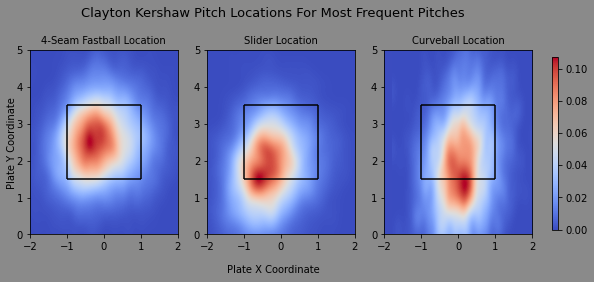

In [10]:
# Putting it all together in one cell to ensure it can be automated down the line for multiple players
player = df[df['player_name'] == 'Clayton Kershaw']

fb = player[player['pitch_name'] == '4-Seam Fastball']
sl = player[player['pitch_name'] == 'Slider']
cb = player[player['pitch_name'] == 'Curveball']

pitches = player['pitch_name'].value_counts().index

X = [fb['plate_x'],sl['plate_x'], cb['plate_x']]
Y = [fb['plate_z'],sl['plate_z'], cb['plate_z']]

# Create subplot in 1 row but for columns equal to number of series in X
fig, ax = plt.subplots(1, len(X), figsize=(9,6))

# Set background to dark grey to match Flask web app
fig.patch.set_facecolor('#8a8a8a')

# Add axes texts, added them this way to have a single common x/y-axis title for all subplots
fig.text(0.5, 0.2, 'Plate X Coordinate', ha='center')
fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')

# Iterate through X (ie. loop through the coordinate data for the different pitches)
# Can use same loop for Y since they are the same list length
for i in range(len(X)):
        # Run the function from above, get the heatmap image and the edges
        img, extent = pitch_plot(X[i], Y[i])
        # Plot the heatmap as an image with the colormap 'coolwarm'
        im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
        # Set reasonable limits
        ax[i].set_xlim(-2, 2)
        ax[i].set_ylim(0, 5)
        # Set background color to be dark blue because sometimes the image limits don't reach the extents of the axes
        ax[i].set_facecolor('#3b4cc0')
        # Draw Strikzone
        # Coordinates from https://tht.fangraphs.com/wp-content/uploads/sites/8/2018/02/sz_full_2017_LHH_RHH.png)
        ax[i].hlines(1.5,-1, 1, color= 'black')
        ax[i].hlines(3.5,-1, 1, color= 'black')
        ax[i].vlines(-1, 1.5, 3.5, color= 'black')
        ax[i].vlines(1, 1.5, 3.5, color= 'black')
        # Set subplot titles
        ax[i].set_title(f'{pitches[i]} Location', fontsize = 10)

# Add an additional figure at the specified coordinates and with specified dimensions
cbar_ax = fig.add_axes([0.93, 0.3, 0.01, 0.4])
# Define the additional figure to be the colorbar (ie. legend)
fig.colorbar(im, cax=cbar_ax)   

# Add plot title, added this way to have a common title for all subplots
fig.text(0.5, 0.8, 'Clayton Kershaw Pitch Locations For Most Frequent Pitches', fontsize=13, 
         horizontalalignment='center', verticalalignment='center')  

# Save the figure, add facecolor argument to make the background colour save, otherwise it doesn't
# plt.savefig('C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/staticplots/Clayton Kershaw_pitches.png', 
#             facecolor=fig.get_facecolor())
plt.show()

***

### Automating the process for all pitchers of interest

Set up a loop to go through all the other pitchers. 

In [12]:
# List of players to go through for now
player_list = ['Justin Verlander', 'Max Scherzer', 'Stephen Strasburg', 'Gerrit Cole',
              'Jacob deGrom', 'Zack Greinke', 'Madison Bumgarner', 'Marcus Stroman', 'Chris Sale', 'Hyun-Jin Ryu']

In [14]:
# Iterate through all players and check they all have 4 pitches worth plotting (ie. all around 1000 counts or greater)
for name in player_list:
    player = df[df['player_name'] == name]
    print(player['pitch_name'].value_counts())
    print('')

4-Seam Fastball     9935
Slider              3821
Curveball           2717
Changeup             881
Cutter                51
2-Seam Fastball       12
Intentional Ball       6
Pitch Out              2
Name: pitch_name, dtype: int64

4-Seam Fastball    8873
Slider             3355
Changeup           2389
Curveball          1403
Cutter              948
2-Seam Fastball      89
Name: pitch_name, dtype: int64

4-Seam Fastball     5599
Curveball           3014
Changeup            2351
2-Seam Fastball     1607
Slider               779
Intentional Ball       4
Name: pitch_name, dtype: int64

4-Seam Fastball     7979
Slider              3194
Knuckle Curve       2091
Changeup            1010
Sinker               832
2-Seam Fastball      710
Curveball             29
Intentional Ball      14
Pitch Out              4
Name: pitch_name, dtype: int64

4-Seam Fastball     6687
Slider              3450
Changeup            2042
2-Seam Fastball     1796
Curveball           1278
Intentional Ball      12
Nam

All pitches above meet the criteria to have 4 major pitches.

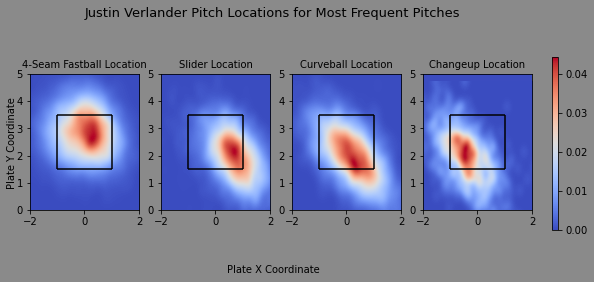

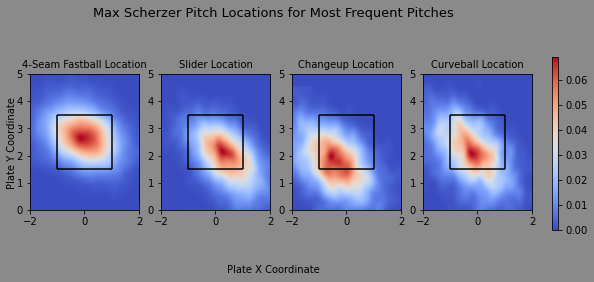

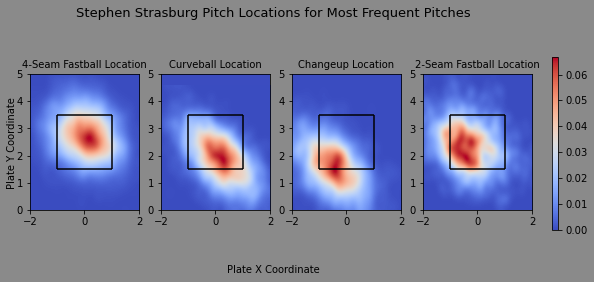

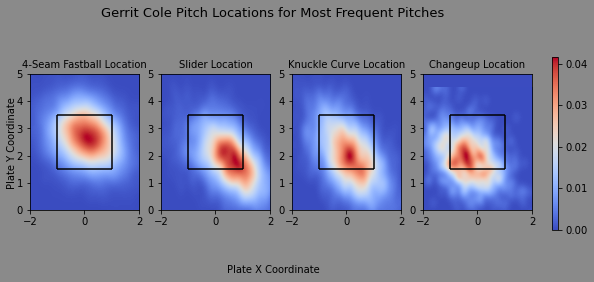

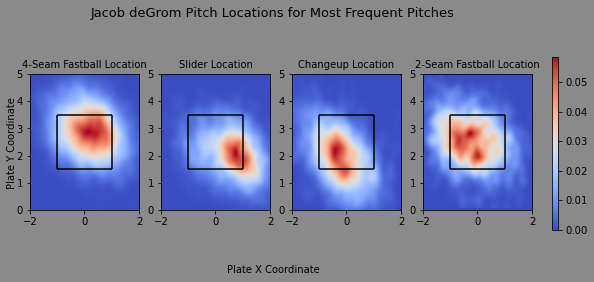

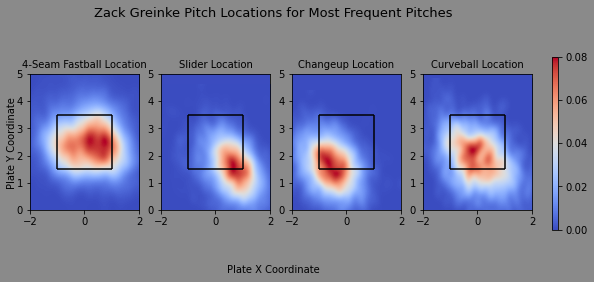

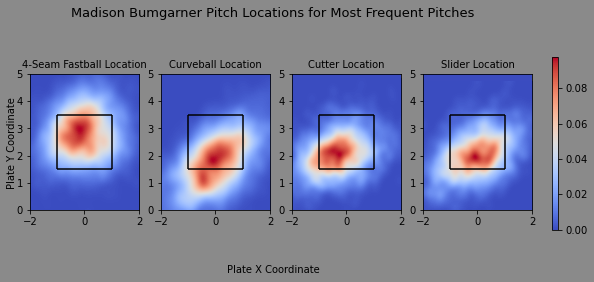

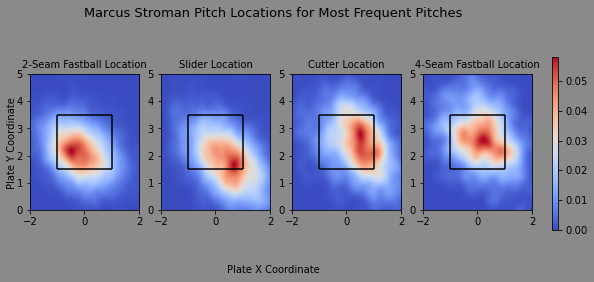

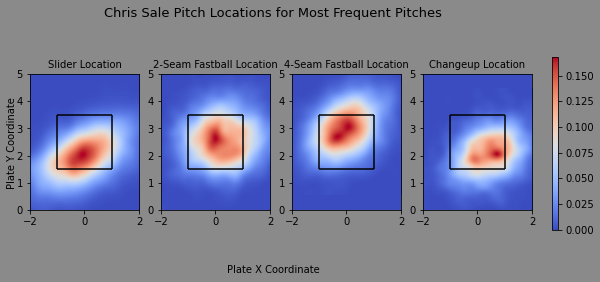

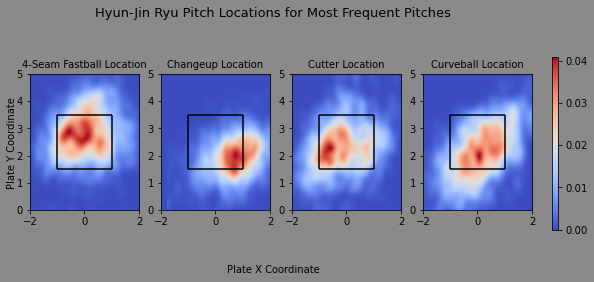

In [30]:
# Use a for loop to automate creating the heatmap plots
# Iterate through list
for name in player_list:
    # Get a df for each player
    player = df[df['player_name'] == name]

    # Get names of 4 most used pitches
    pitches = player['pitch_name'].value_counts()[:4].index

    # Do major pitches only
    first = player[player['pitch_name'] == pitches.values[0]]
    second = player[player['pitch_name'] == pitches.values[1]]
    third = player[player['pitch_name'] == pitches.values[2]]
    fourth = player[player['pitch_name'] == pitches.values[3]]
    
    # Combine into X and Y
    X = [first['plate_x'],second['plate_x'],third['plate_x'],fourth['plate_x']]
    Y = [first['plate_z'],second['plate_z'],third['plate_z'],fourth['plate_z']]
    
    # Same graphic logic and code as above
    fig, ax = plt.subplots(1, len(X), figsize=(9,6))
    fig.patch.set_facecolor('#8a8a8a')
    fig.text(0.5, 0.2, 'Plate X Coordinate', ha='center')
    fig.text(0.09, 0.5, 'Plate Y Coordinate', va='center', rotation='vertical')

    for i in range(len(X)):
            img, extent = pitch_plot(X[i], Y[i])
            im = ax[i].imshow(img, extent=extent, origin='lower', cmap = 'coolwarm')
            ax[i].set_xlim(-2, 2)
            ax[i].set_ylim(0, 5)
            ax[i].set_facecolor('#3b4cc0')
            # Draw Strikzone
            ax[i].hlines(1.5,-1, 1, color= 'black')
            ax[i].hlines(3.5,-1, 1, color= 'black')
            ax[i].vlines(-1, 1.5, 3.5, color= 'black')
            ax[i].vlines(1, 1.5, 3.5, color= 'black')
            ax[i].set_title(f'{pitches[i]} Location', fontsize = 10)

    cbar_ax = fig.add_axes([0.93, 0.3, 0.01, 0.4])
    fig.colorbar(im, cax=cbar_ax)   
    fig.text(0.5, 0.8, f'{name} Pitch Locations for Most Frequent Pitches', fontsize=13, 
             horizontalalignment='center', verticalalignment='center')  

# Use a f-string to create unique identifiable plot names for each pitcher
#     plt.savefig(f'C:/Users/Boyang Qiu/Desktop/Brainstation/Capstone/static/staticplots/{name}_pitches.png',
#                facecolor=fig.get_facecolor())

***

## AIM: Test code to make sure I can make scalable code that would grab the pitch class names for each individual pitcher for the purpose of creating annotate full probability plots on my web app


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('pitches_final_simplified.csv', index_col = 0)

C:\ProgramData\Anaconda\envs\capstone\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
# List of players to go through for now
player_list = ['Clayton Kershaw', 'Justin Verlander', 'Max Scherzer', 'Stephen Strasburg', 'Gerrit Cole',
              'Jacob deGrom', 'Zack Greinke', 'Madison Bumgarner', 'Marcus Stroman', 'Chris Sale', 'Hyun-Jin Ryu']

In [5]:
# Create an empty df to hold all the pitch names
pitch_df = pd.DataFrame()
for name in player_list:
    kershaw = df[df['player_name']==name]

    # Drop intentional balls and pitch outs, they aren't real pitches and batters don't need to worry about them
    kershaw.drop(kershaw[kershaw['pitch_name']=='Intentional Ball'].index, inplace=True, errors = 'ignore')
    kershaw.drop(kershaw[kershaw['pitch_name']=='Pitch Out'].index, inplace=True, errors = 'ignore')
    kershaw.drop(kershaw[kershaw['pitch_name']=='Other'].index, inplace=True, errors = 'ignore')

    # Unable to classify/do regression with classes with only 1 instance
    # so drop the rows with that pitch as well as the row w/ corresponding 'prev_pitch'
    for i in range(len(kershaw['pitch_name'].value_counts())):
        if kershaw['pitch_name'].value_counts()[i] == 1:
            drop = kershaw['pitch_name'].value_counts().index[i]
            kershaw.drop(kershaw[kershaw['pitch_name']==drop].index, inplace=True)
            kershaw.drop(kershaw[kershaw['prev_pitch']==drop].index, inplace=True)
            
    # Mirror the transformation of the pitch names to dummies for use in TF model
    y = kershaw['pitch_name']
    pitch = pd.get_dummies(y.copy())
    # Append each dummie df's columns (pitch names) to the pitch_df
    # Must be turned into a pd.series to be appended
    pitch_df = pitch_df.append(pd.Series(pitch.columns.values), ignore_index = True)
    
# Add player names as the indices
pitch_df.index = player_list
# Save as a csv
pitch_df.to_csv('pitch_names.csv')

C:\ProgramData\Anaconda\envs\capstone\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
# Check it went accordingly
df = pd.read_csv('pitch_names.csv', index_col = 0)
df

,0,1,2,3
Clayton Kershaw,Breaking Ball,Fastball,Off-speed,NaN
Justin Verlander,Breaking Ball,Fastball,Off-speed,NaN
Max Scherzer,Breaking Ball,Fastball,Off-speed,NaN
Stephen Strasburg,Breaking Ball,Fastball,Off-speed,NaN
Gerrit Cole,Breaking Ball,Fastball,Off-speed,NaN
Jacob deGrom,Breaking Ball,Fastball,Off-speed,NaN
Zack Greinke,Breaking Ball,Fastball,Junk,Off-speed
Madison Bumgarner,Breaking Ball,Fastball,Off-speed,NaN
Marcus Stroman,Breaking Ball,Fastball,Off-speed,NaN
Chris Sale,Breaking Ball,Fastball,Off-speed,NaN


In [7]:
# Try to get the row values as a list
df[df.index == 'Clayton Kershaw'].dropna(axis = 1).values.tolist().pop()

['Breaking Ball', 'Fastball', 'Off-speed']

In [8]:
# Try to get the row values as a list
df[df.index == 'Zack Greinke'].dropna(axis = 1).values.tolist().pop()

['Breaking Ball', 'Fastball', 'Junk', 'Off-speed']

Using this workflow, I can definitely get the pitch classes out as a list to be used a plot tick labels for a probability plot. I will combine and incorporate this code into my final scripts.

***